In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
data = pd.read_csv('animals_weight.txt', delim_whitespace=True, header=None, names=['brain_weight', 'body_weight'])
data


,brain_weight,body_weight
0,Brain,Body
1,3.385,44.500
2,0.480,15.500
3,1.350,8.100
4,465.000,423.000
...,...,...
58,160.000,169.000
59,0.900,2.600
60,1.620,11.400
61,0.104,2.500


In [3]:
data.head()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brain_weight  63 non-null     object
 1   body_weight   63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Mean Absolute Error: 62.95384615384616
Mean Squared Error: 26725.18136752137
Root Mean Squared Error: 163.47838195774196


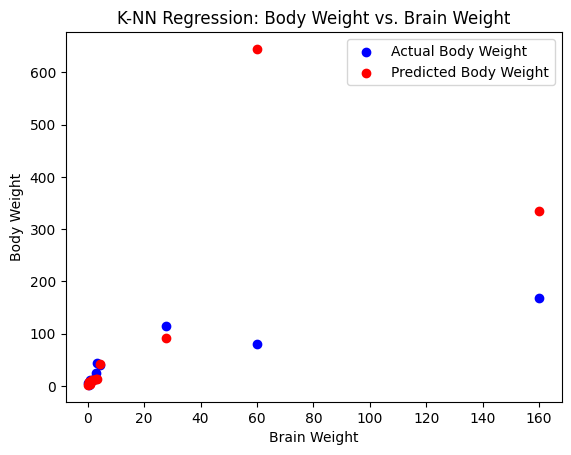

In [4]:


data = data.apply(pd.to_numeric, errors='coerce')

data.dropna(inplace=True)


X = data[['brain_weight']]  # Independent variable
y = data['body_weight']      # Dependent variable


if X.isnull().values.any() or y.isnull().values.any():
    print("NaN values found in input features or target variable.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    k = 3  
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')

    plt.scatter(X_test, y_test, color='blue', label='Actual Body Weight')
    plt.scatter(X_test, y_pred, color='red', label='Predicted Body Weight')
    plt.xlabel('Brain Weight')
    plt.ylabel('Body Weight')
    plt.title('K-NN Regression: Body Weight vs. Brain Weight')
    plt.legend()
    plt.show()

In [5]:




X = data[['brain_weight']]
y = data['body_weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_samples = pd.DataFrame({'brain_weight': [53.298, 1247.122, 0.583, 4.859, 0.041]})

for k in [1, 3, 5]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)  
    predictions = knn.predict(test_samples) 
    print(f'Predictions using {k}-NN:')
    for i, weight in enumerate(predictions):
        print(f'Sample {i+1} (Brain Weight: {test_samples.iloc[i, 0]}): Predicted Body Weight: {weight:.2f}')
    print()

Predictions using 1-NN:
Sample 1 (Brain Weight: 53.298): Predicted Body Weight: 440.00
Sample 2 (Brain Weight: 1247.122): Predicted Body Weight: 680.00
Sample 3 (Brain Weight: 0.583): Predicted Body Weight: 15.50
Sample 4 (Brain Weight: 4.859): Predicted Body Weight: 50.40
Sample 5 (Brain Weight: 0.041): Predicted Body Weight: 0.33

Predictions using 3-NN:
Sample 1 (Brain Weight: 53.298): Predicted Body Weight: 645.00
Sample 2 (Brain Weight: 1247.122): Predicted Body Weight: 586.00
Sample 3 (Brain Weight: 0.583): Predicted Body Weight: 6.97
Sample 4 (Brain Weight: 4.859): Predicted Body Weight: 41.80
Sample 5 (Brain Weight: 0.041): Predicted Body Weight: 0.34

Predictions using 5-NN:
Sample 1 (Brain Weight: 53.298): Predicted Body Weight: 422.10
Sample 2 (Brain Weight: 1247.122): Predicted Body Weight: 530.80
Sample 3 (Brain Weight: 0.583): Predicted Body Weight: 5.84
Sample 4 (Brain Weight: 4.859): Predicted Body Weight: 30.06
Sample 5 (Brain Weight: 0.041): Predicted Body Weight: 0.4

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


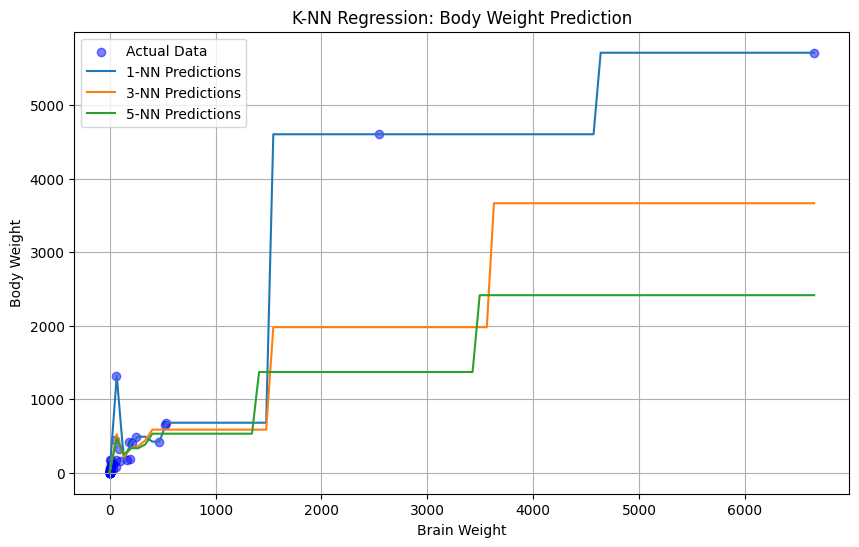

In [6]:

X = data[['brain_weight']]
y = data['body_weight']

brain_weights_range = np.linspace(X['brain_weight'].min(), X['brain_weight'].max(), 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5)

for k in [1, 3, 5]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)  # Fit model on the entire dataset
    predictions = knn.predict(brain_weights_range)  # Predict for the range of brain weights
    plt.plot(brain_weights_range, predictions, label=f'{k}-NN Predictions')

plt.title('K-NN Regression: Body Weight Prediction')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.legend()
plt.grid()
plt.show()

In [7]:
df = pd.read_csv('wine_quality.csv', sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df.describe(), df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1599.000000          1599.000000           1599.000000  1599.000000   
 mean      0.087467            15.874922             46.467792     0.996747   
 std       0.047065            10.460157             32.895324     0.001887   
 min       0.012000             1.

In [9]:

X = df.drop('quality', axis=1)  
y = df['quality']                 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_samples = pd.DataFrame({
    'fixed acidity': [7.5, 5.4, 8.2, 6.0, 10.8],
    'volatile acidity': [0.9, 0.78, 0.56, 0.7, 0.43],
    'citric acid': [0.26, 0.17, 0.46, 0.01, 31],
    'residual sugar': [2.3, 3.2, 1.7, 4.6, 2.5],
    'chlorides': [0.054, 0.084, 0.069, 0.093, 0.105],
    'free sulfur dioxide': [19, 11, 25, 6, 35],
    'total sulfur dioxide': [13, 58, 15, 104, 31],
    'density': [0.99708, 0.9987, 0.997, 0.99746, 1.0001],
    'pH': [3.78, 2.94, 3.39, 3.12, 3.22],
    'sulphates': [0.55, 0.83, 0.65, 0.52, 0.48],
    'alcohol': [9.7, 11.8, 12.5, 10.5, 11.1]
})

predictions = {}

for k in [1, 3, 5]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)  # Fit the model on the training data
    preds = knn.predict(test_samples)  # Predict on the test samples
    predictions[k] = preds

for k, preds in predictions.items():
    print(f'Predictions using {k}-NN:')
    for i, quality in enumerate(preds):
        print(f'Sample {i+1}: Predicted Quality: {quality:.2f}')
    print()

Predictions using 1-NN:
Sample 1: Predicted Quality: 6.00
Sample 2: Predicted Quality: 5.00
Sample 3: Predicted Quality: 6.00
Sample 4: Predicted Quality: 6.00
Sample 5: Predicted Quality: 6.00

Predictions using 3-NN:
Sample 1: Predicted Quality: 6.33
Sample 2: Predicted Quality: 5.33
Sample 3: Predicted Quality: 6.00
Sample 4: Predicted Quality: 5.33
Sample 5: Predicted Quality: 6.00

Predictions using 5-NN:
Sample 1: Predicted Quality: 6.60
Sample 2: Predicted Quality: 5.20
Sample 3: Predicted Quality: 6.20
Sample 4: Predicted Quality: 5.20
Sample 5: Predicted Quality: 6.00

